<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Project: NLP Analysis of Reddit Data 
## Part 4: Model Fitting

Katrin Ayrapetov 

In [3]:
#pip install pmaw 
import pandas as pd
from pmaw import PushshiftAPI
import datetime as dt
import matplotlib.pyplot as plt
import re

In [4]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [5]:
df =  pd.read_csv('../Data/df_final.csv')

In [6]:
df.shape

(24033, 2)

In [7]:
def lemmatize(string):
    '''
    returns a lemmatized version of the input string minus english stopwords from nltk
    '''
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    
    lem = WordNetLemmatizer()
    word_list = [lem.lemmatize(word) for word in string.strip().split(' ') if word not in stopwords.words('english')]
    return ' '.join(word_list) 

In [8]:
df['body_lemmatized'] = df['body'].apply(lemmatize)

In [9]:
df['level'].replace({'elem_school':0, 'high_school':1}, inplace=True)
df['level'].value_counts()

1    15656
0     8377
Name: level, dtype: int64

In [10]:
X = df['body_lemmatized']
y = df['level']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

<font style="font-size: 2rem; color: blue">
Logistic Regression with CountVectorizer

</font>

In [28]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'cvec__max_features': [None, 2500, 3000],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'model__C' : [1, 0.1, 0.01],
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2']
}

gs = GridSearchCV(pipe, params, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)

print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:')
gs.best_params_

Best Score: 0.9349698185670873
Best Parameters:


{'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__stop_words': None,
 'model__C': 0.1,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [30]:
#Test Score 
print(f"This is the Test Score {gs.score(X_test, y_test)}")
#Train Score
print(f"This is the Train Score {gs.score(X_train, y_train)}")


This is the Test Score 0.9356449375866852
This is the Train Score 0.9415680913035724


In [31]:
preds_logreg = gs.predict(X_test)

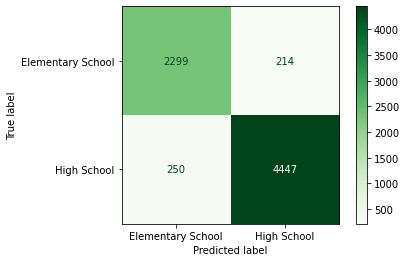

In [32]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Elementary School', 'High School'], cmap='Greens');

<font style="font-size: 2rem; color: blue">
Logistic Regression with TF-IDF Vectorizer

</font>

In [110]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'tvec__max_features': [None, 2500, 3000],
    'tvec__max_df': [.8, .7, 1.0],
    'tvec__stop_words':['english', None],
    'model__C' : [1, 0.1, 0.01],
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2']
}

gs = GridSearchCV(pipe, params, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)

print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:')
gs.best_params_

Best Score: 0.9348705241671379
Best Parameters:


{'model__C': 1,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__stop_words': 'english'}

This is the Test Score for Logistic Regression with TF-IDF 0.9366333887964503
This is the Train Score for Logistic Regression with TF-IDF 0.9379605419538863


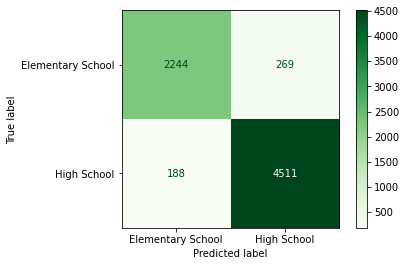

In [111]:
#Test Score 
print(f"This is the Test Score for Logistic Regression with TF-IDF {gs.score(X_test, y_test)}")
#Train Score
print(f"This is the Train Score for Logistic Regression with TF-IDF {gs.score(X_train, y_train)}")
preds_logreg = gs.predict(X_test)
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Elementary School', 'High School'], cmap='Greens');

In [ ]:
classification_report(y_test,preds_logreg)

<font style="font-size: 2rem; color: blue">
Support Vector Machine with CountVectorizer

</font>

In [112]:
pipe_svm = Pipeline([
    ('cvec', CountVectorizer()),
    ('svm', SVC())
])

params_svm = {
    'cvec__max_features': [None, 2500, 3000, 3500],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'svm__kernel': ['poly', 'rbf', 'sigmoid']
}

gs_svm = GridSearchCV(pipe_svm, params_svm)
gs_svm.fit(X_train, y_train)
gs_svm.best_score_
gs_svm.best_params_

{'cvec__max_df': 1.0,
 'cvec__max_features': 3000,
 'cvec__stop_words': 'english',
 'svm__kernel': 'rbf'}

This is the Test Score for Logistic Regression with TF-IDF 0.9184692179700499
This is the Train Score for Logistic Regression with TF-IDF 0.9695150938911338


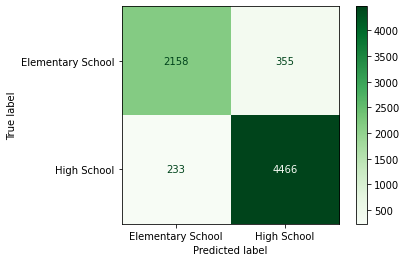

In [113]:
#Test Score 
print(f"This is the Test Score for Logistic Regression with TF-IDF {gs_svm.score(X_test, y_test)}")
#Train Score
print(f"This is the Train Score for Logistic Regression with TF-IDF {gs_svm.score(X_train, y_train)}")
preds_gs_svm = gs_svm.predict(X_test)
plot_confusion_matrix(gs_svm, X_test, y_test, display_labels=['Elementary School', 'High School'], cmap='Greens');

<font style="font-size: 2rem; color: blue">
Support Vector Machine with TF-IDF Vectorizer
</font>

In [33]:
pipe_svm_tf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svm', SVC())
])

params_svm_tf = {
    'tvec__max_features': [None, 2500, 3000, 3500],
    'tvec__max_df': [.8, .7, 1.0],
    'tvec__stop_words':['english', None],
    'svm__kernel': ['poly', 'rbf', 'sigmoid']
}

gs_svm_tf = GridSearchCV(pipe_svm_tf, params_svm_tf)
gs_svm_tf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('svm', SVC())]),
             param_grid={'svm__kernel': ['poly', 'rbf', 'sigmoid'],
                         'tvec__max_df': [0.8, 0.7, 1.0],
                         'tvec__max_features': [None, 2500, 3000, 3500],
                         'tvec__stop_words': ['english', None]})

This is the Test Score for Support Vector Machine with TF-IDF Vectorizer  0.9276005547850208
This is the Train Score for Support Vector Machine with TF-IDF Vectorizer  0.9342566724127682


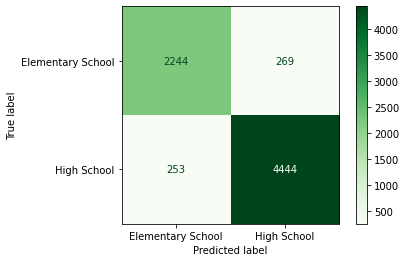

In [35]:
#Test Score 
print(f"This is the Test Score for Support Vector Machine with TF-IDF Vectorizer  {gs_svm_tf.score(X_test, y_test)}")
#Train Score
print(f"This is the Train Score for Support Vector Machine with TF-IDF Vectorizer  {gs_svm_tf.score(X_train, y_train)}")
preds_gs_svm_tf = gs_svm_tf.predict(X_test)
plot_confusion_matrix(gs_svm_tf, X_test, y_test, display_labels=['Elementary School', 'High School'], cmap='Greens');

In [ ]:
classification_report(y_test,preds_gs_svm_tf)

<font style="font-size: 2rem; color: blue">
Multinomial Naive Bayes
</font>


In [12]:
pipe_mnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

params_mnb = {
    'cvec__max_features': [None, 2500, 3000, 3500],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'mnb__alpha': [0.001, 0.1, 1.0]
}

gs_mnb = GridSearchCV(pipe_mnb, params_mnb)
gs_mnb.fit(X_train, y_train)
print(gs_mnb.best_score_)




0.8454493606811392


This is the Test Score for Logistic Regression with TF-IDF 0.8507628294036061
This is the Train Score for Logistic Regression with TF-IDF 0.867800035665458


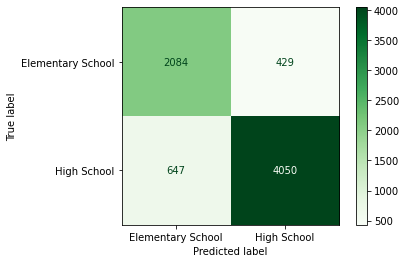

In [13]:
#Test Score 
print(f"This is the Test Score for Logistic Regression with TF-IDF {gs_mnb.score(X_test, y_test)}")
#Train Score
print(f"This is the Train Score for Logistic Regression with TF-IDF {gs_mnb.score(X_train, y_train)}")
plot_confusion_matrix(gs_mnb, X_test, y_test, display_labels=['Elementary School', 'High School'], cmap='Greens');

In [14]:
preds_gs_mnb = gs_mnb.predict(X_test)